## Write SEG-Y with `obspy`

Before going any further, you might like to know, [What is SEG-Y?](http://www.agilegeoscience.com/blog/2014/3/26/what-is-seg-y.html). See also the articles in [SubSurfWiki](http://www.subsurfwiki.org/wiki/SEG_Y) and [Wikipedia](https://en.wikipedia.org/wiki/SEG_Y).

We'll use the [obspy](https://github.com/obspy/obspy) seismology library to read and write SEGY data.
    
Technical SEG-Y documentation:

* [SEG-Y Rev 1](http://seg.org/Portals/0/SEG/News%20and%20Resources/Technical%20Standards/seg_y_rev1.pdf)
* [SEG-Y Rev 2 proposal](https://www.dropbox.com/s/txrqsfuwo59fjea/SEG-Y%20Rev%202.0%20Draft%20August%202015.pdf?dl=0) and [draft repo](http://community.seg.org/web/technical-standards-committee/documents/-/document_library/view/6062543)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls -l ../data/*.sgy

-rw-rw-r-- 1 matt matt 3811416128 Jun 12  2015 ../data/3D_gathers_pstm_nmo_X1001.sgy
-rw-rw-r-- 1 matt matt     256732 Aug 27  2015 ../data/F3_very_small.sgy
-rw-rw-r-- 1 matt matt   48281760 Aug 28  2015 ../data/HUN00-ALT-01_STK.sgy
-rw-rw-r-- 1 matt matt  359620364 Sep 12  2016 ../data/Penobscot_0-1000ms.sgy
-rw-rw-r-- 1 matt matt  474438768 Aug 25  2015 ../data/Penobscot.sgy


## 2D data

In [3]:
filename = '../data/HUN00-ALT-01_STK.sgy'

In [4]:
from obspy.io.segy.segy import _read_segy
section = _read_segy(filename)  # unpack_headers=True slows you down here

In [5]:
data = np.vstack([t.data for t in section.traces])

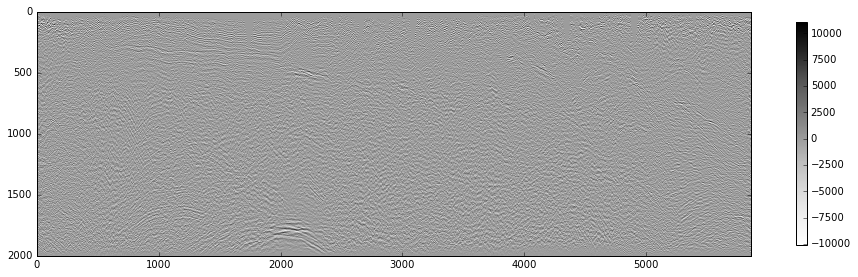

In [6]:
plt.figure(figsize=(16,8))
plt.imshow(data.T, cmap="Greys")
plt.colorbar(shrink=0.5)
plt.show()

Formatted header:

In [7]:
def chunk(string, width=80):
    lines = int(np.ceil(len(string) / width))
    result = ''
    for i in range(lines):
        line = string[i*width:i*width+width]
        result += line + (width-len(line))*' ' + '\n'
    return result

s = section.textual_file_header.decode()
print(chunk(s))

C01  PROCESSED BY: VERITAS GEOSERVICES LTD.                                     
C02  CLIENT      : HUNT OIL COMPANY                                             
C03  AREA        : ALTON                                                        
C04  LINE        : ALT-01                                                       
C05  DATA   NOISE ATTENUATED STRUCTURE STACK                                    
C06         (FILTERED/SCALED)                                                   
C07                                                                             
C08                                                                             
C09  SAMPLE RATE   2 MS.                                                        
C10  FIELD DATA LENGTH 3.0 SEC.; (PROCESSED TO 2.0 SEC)                         
C11  PROCESSING SEQUENCE:                                                       
C12  DEMULTIPLEX:SAMPLE RATE:1 MS RECORD LEN.:3 SEC.S                           
C13  GEOMETRY               

In [8]:
section.binary_file_header

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 1
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 1000
	sample_interval_in_microseconds_of_original_field_recording: 1000
	number_of_samples_per_data_trace: 2000
	number_of_samples_per_data_trace_for_original_field_recording: 2000
	data_sample_format_code: 1
	ensemble_fold: 1
	trace_sorting_code: 4
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 10
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [9]:
section.traces[0].header

trace_sequence_number_within_line: 1
trace_sequence_number_within_segy_file: 1
original_field_record_number: 1
trace_number_within_the_original_field_record: 1
energy_source_point_number: 101000
ensemble_number: 1
trace_number_within_the_ensemble: 1
trace_identification_code: 2
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 0
data_use: 1
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 0
scalar_to_be_applied_to_all_coordinates: -10
source_coordinate_x: 4838911
source_coordinate_y: 49950729
group_coordinate_x: 4838911
group_coordinate_y: 49950729
coordinate_units: 0
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_source_i

In [10]:
len(section.traces[0].data)

2000

## Change the data

Let's scale the data.

In [11]:
scaled = data / 1000
scaled[np.isnan(scaled)] = 0

In [12]:
scaled

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.0620006 ,
        -0.11197116, -0.14608523],
       [ 0.        ,  0.        ,  0.        , ...,  0.03547406,
         0.04016089,  0.0383723 ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.20556137,
         0.19266182,  0.168312  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.18680261,
         0.16577934,  0.12612453],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

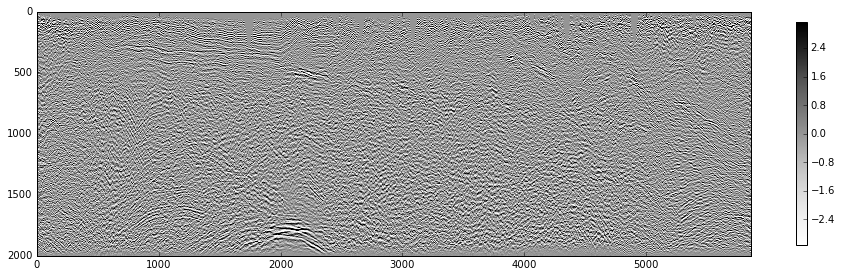

In [13]:
vm = np.percentile(scaled, 99)

plt.figure(figsize=(16,8))
plt.imshow(scaled.T, cmap="Greys", vmin=-vm, vmax=vm)
plt.colorbar(shrink=0.5)
plt.show()

## Write data

Let's write this all back to a new SEG-Y file.

In [14]:
from obspy.core import Trace, Stream, UTCDateTime
from obspy.io.segy.segy import SEGYTraceHeader

In [26]:
stream = Stream()

for i, trace in enumerate(scaled):

    # Make the trace.
    tr = Trace(trace)

    # Add required data.
    tr.stats.delta = 0.004
    tr.stats.starttime = 0  # Not strictly required.

    # Add yet more to the header (optional).
    tr.stats.segy = {'trace_header': SEGYTraceHeader()}
    tr.stats.segy.trace_header.trace_sequence_number_within_line = i + 1
    tr.stats.segy.trace_header.receiver_group_elevation = 0

    # Append the trace to the stream.
    stream.append(tr)

In [27]:
stream

5859 Trace(s) in Stream:

Seq. No. in line:    1 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:07.996000Z | 250.0 Hz, 2000 samples
...
(5857 other traces)
...
Seq. No. in line: 5859 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:07.996000Z | 250.0 Hz, 2000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [28]:
stream.write('../data/out.sgy', format='SEGY', data_encoding=5)  # encode 5 for IEEE

## Add a file-wide header

So far we only attached metadata to the traces, but we can do more by attaching some filewide metadata, like a textual header. A SEGY file normally has a file wide text header. This can be attached to the stream object.

If this header and the binary header are not set, they will be autocreated with defaults.

In [29]:
from obspy.core import AttribDict
from obspy.io.segy.segy import SEGYBinaryFileHeader

In [30]:
# Text header.
stream.stats = AttribDict()
stream.stats.textual_file_header = '{:80s}'.format('This is the textual header.').encode()
stream.stats.textual_file_header += '{:80s}'.format('This file contains seismic data.').encode()

# Binary header.
stream.stats.binary_file_header = SEGYBinaryFileHeader()
stream.stats.binary_file_header.trace_sorting_code = 4
stream.stats.binary_file_header.seg_y_format_revision_number = 0x0100

In [31]:
import sys
stream.write('../data/out.sgy', format='SEGY', data_encoding=5, byteorder=sys.byteorder)

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>